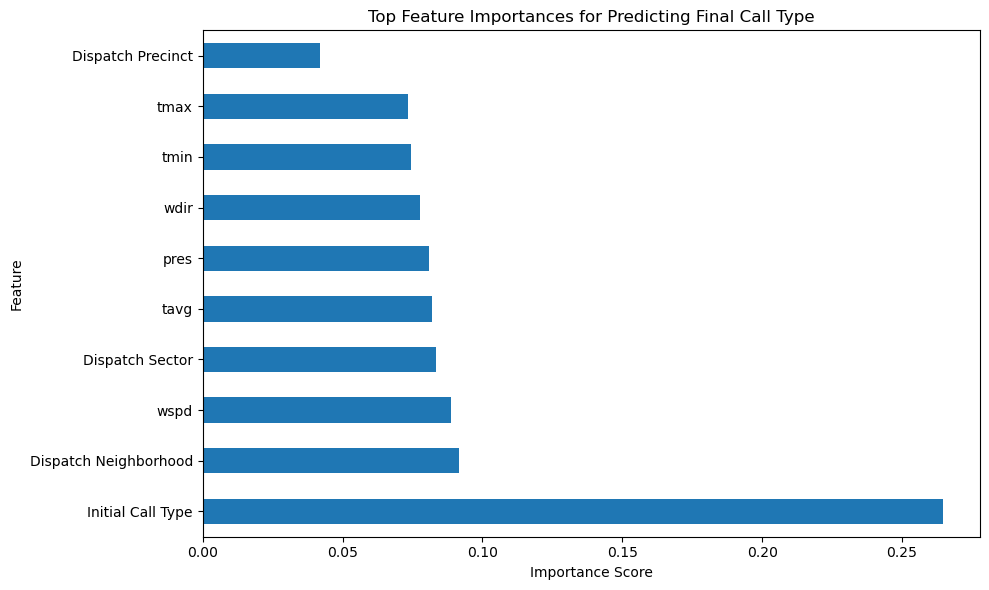

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# Step 1: Load the dataset
df = pd.read_csv("merged_spd_weather.csv", low_memory=False)

# Step 2: Select relevant columns and drop missing values
selected_columns = [
    'Initial Call Type', 'Dispatch Precinct', 'Dispatch Sector',
    'Dispatch Neighborhood', 'tavg', 'tmin', 'tmax', 'prcp',
    'wdir', 'wspd', 'pres', 'Final Call Type'
]
df_model = df[selected_columns].dropna()
# Step 3: Encode categorical variables
label_encoders = {}
for col in ['Initial Call Type', 'Dispatch Precinct', 'Dispatch Sector', 'Dispatch Neighborhood']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
df_model['Final Call Type'] = target_encoder.fit_transform(df_model['Final Call Type'])

# Step 4: Split into features and target
X = df_model.drop('Final Call Type', axis=1).astype('float32')
y = df_model['Final Call Type']

# Step 5: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest with class balancing
rf = RandomForestClassifier(n_estimators=50, max_depth=15, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

present_labels = np.unique(y_test)
present_names = target_encoder.inverse_transform(present_labels)
# print(classification_report(y_test, y_pred, labels=present_labels, target_names=present_names))
# print(confusion_matrix(y_test, y_pred))

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
pd.Series(importances, index=features).nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances for Predicting Final Call Type")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()